# SVM Lineal

Vamos a trabajar con el dataset Iris:

In [7]:
import pandas as pd
iris=pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


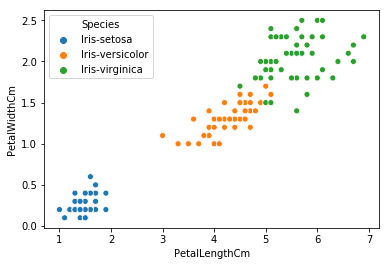

In [5]:
import seaborn as sns
sns.scatterplot('PetalLengthCm', 'PetalWidthCm', hue='Species', data=iris)

Usaremos una SVM para separar setosa de versicolor

In [6]:
setosa_versicolor=iris[(iris.Species=='Iris-setosa')|(iris.Species=='Iris-versicolor')]
setosa_versicolor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


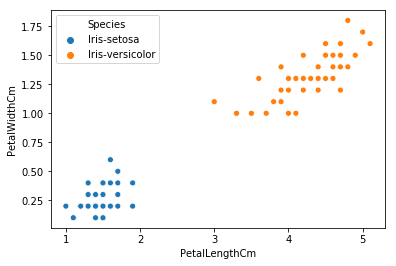

In [8]:
sns.scatterplot('PetalLengthCm', 'PetalWidthCm', hue='Species', data=setosa_versicolor)

In [9]:
X=setosa_versicolor[['PetalLengthCm', 'PetalWidthCm']]
y=setosa_versicolor['Species']

In [10]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear', C=float('inf')) # Definir
svm_clf.fit(X,y) # Ajustar

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Los $w_1$ y $w_2$:

In [11]:
svm_clf.coef_

array([[1.29411744, 0.82352928]])

El $b$:

In [12]:
svm_clf.intercept_

array([-3.78823471])

Los vectores soporte:

In [14]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

Para pintarnos el hiperplano separador:

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "r-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

[0, 5.5, 0, 2]

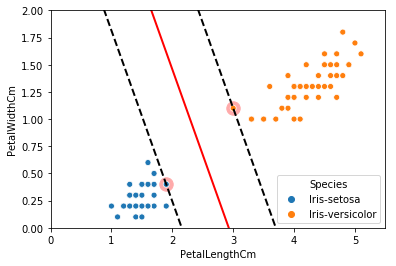

In [17]:
plot_svc_decision_boundary(svm_clf,0, 5.5)
sns.scatterplot('PetalLengthCm', 'PetalWidthCm', hue='Species', data=setosa_versicolor)
plt.axis([0,5.5,0,2])

## Sensibilidad a las escalas

In [23]:
Xs=np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys=np.array([0,0, 1,1])
svm_clf = SVC(kernel='linear',C=100)
svm_clf.fit(Xs,ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled=scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel='linear',C=100)
svm_clf_scaled.fit(X_scaled,ys)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

[-2, 2, -2, 2]

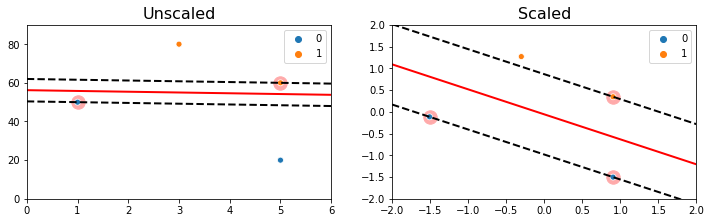

In [25]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plot_svc_decision_boundary(svm_clf, 0, 6)
sns.scatterplot(Xs[:,0],Xs[:,1], hue=ys)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
sns.scatterplot(X_scaled[:,0],X_scaled[:,1], hue=ys)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

## Soft margin

Vamos a separar ahora virginica y versicolor

In [26]:
virginica_versicolor = iris[(iris.Species=='Iris-virginica')|(iris.Species=='Iris-versicolor')]
virginica_versicolor

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor


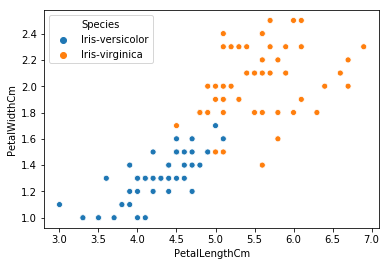

In [27]:
sns.scatterplot('PetalLengthCm','PetalWidthCm',hue='Species',data=virginica_versicolor)

No son linealmente separables.

In [28]:
X=virginica_versicolor[['PetalLengthCm','PetalWidthCm']]
y=virginica_versicolor['Species']

In [29]:
# Escalamos X
X=scaler.fit_transform(X)

Modelos con distintos valores de C

In [30]:
svm_C_grande = SVC(kernel='linear', C=100)
svm_C_pequeño = SVC(kernel='linear', C=1)

In [31]:
svm_C_grande.fit(X,y)
svm_C_pequeño.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Text(0.5, 1.0, 'C=1')

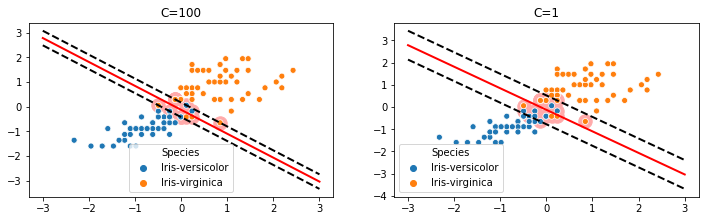

In [34]:
plt.figure(figsize=(12,3.2))

plt.subplot(121)
plot_svc_decision_boundary(svm_C_grande, -3,3)
sns.scatterplot(X[:,0],X[:,1], hue=y)
plt.title('C=100')

plt.subplot(122)
plot_svc_decision_boundary(svm_C_pequeño, -3,3)
sns.scatterplot(X[:,0],X[:,1], hue=y)
plt.title('C=1')

# SVM No Lineal

Vamos a usar `make_moons`, que es un paquete dentro de Scikit-learn que nos genera grupos de puntos del plano aleatoriamente.

In [35]:
from sklearn.datasets import make_moons

In [36]:
help(make_moons)

Help on function make_moons in module sklearn.datasets.samples_generator:

make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
    Make two interleaving half circles
    
    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated.
    
    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.
    
    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.
    
    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.
    
    Returns
    -------
    X : array of shape [n_samples, 2]
        The 

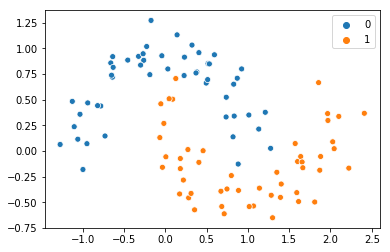

In [37]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

sns.scatterplot(X[:,0],X[:,1], hue=y)

Vamos a escalar los datos:

In [38]:
X = scaler.fit_transform(X)

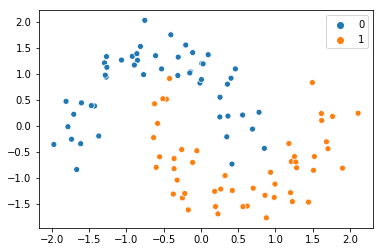

In [39]:
sns.scatterplot(X[:,0],X[:,1], hue=y)

Vamos a usar un script para pintarnos las fronteras de clasificacion:

In [40]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

## Núcleo polinomial
$K(\mathbf{a},\mathbf{b})=(\mathbf{a}\cdot \mathbf{b} + r)^d$

+ $d$ es `degree`
+ $r$ es `coef0`

In [41]:
poly_kernel_svm=SVC(kernel='poly', degree=3, coef0=1, C=5)
poly_kernel_svm.fit(X,y)

SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Text(0.5, 1.0, '$d=3, r=1, C=5$')

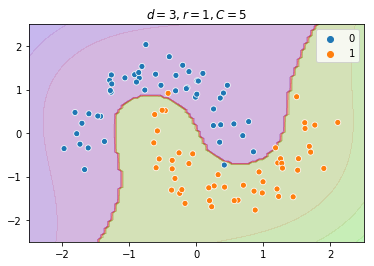

In [43]:
plot_predictions(poly_kernel_svm, [-2.5,2.5,-2.5,2.5])
sns.scatterplot(X[:,0],X[:,1], hue=y)
plt.title('$d=3, r=1, C=5$')

Text(0.5, 1.0, '$d=10, r=100, C=5$')

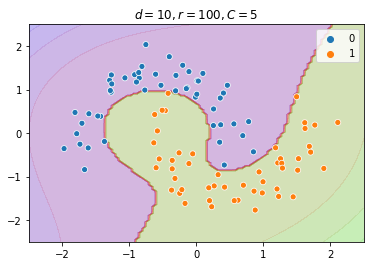

In [44]:
# Con otros d y r
poly_kernel_svm=SVC(kernel='poly', degree=10, coef0=100, C=5)
poly_kernel_svm.fit(X,y)
plot_predictions(poly_kernel_svm, [-2.5,2.5,-2.5,2.5])
sns.scatterplot(X[:,0],X[:,1], hue=y)
plt.title('$d=10, r=100, C=5$')

## Núcleo radial (Radial Basis Function, RBF)
$K(\mathbf{a},\mathbf{b})=\exp(-\gamma ||\mathbf{a}-\mathbf{b}||^2)$

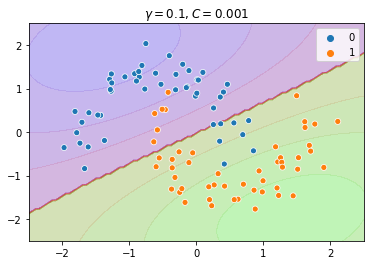

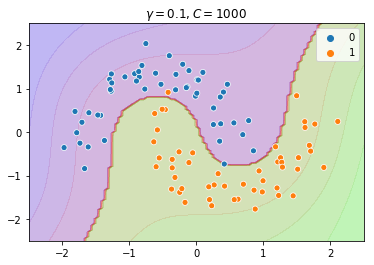

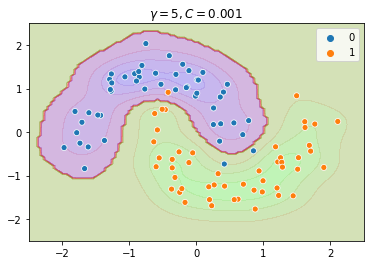

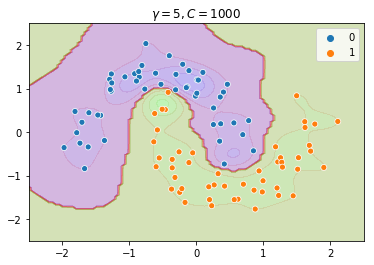

In [50]:
gammas = [0.1, 5]
Cs = [0.001, 1000]

for gamma in gammas:
    for C in Cs:
        rbf_kernel_svm_clf = SVC(kernel='rbf', gamma=gamma, C=C) # Definir
        rbf_kernel_svm_clf.fit(X,y) # Ajustar
        plot_predictions(rbf_kernel_svm_clf, [-2.5,2.5,-2.5,2.5])
        sns.scatterplot(X[:,0],X[:,1], hue=y)
        plt.title(r"$\gamma = {}, C={}$".format(gamma,C))
        plt.show()